In [1]:
#importing neccesary libraries
import numpy as np
from math import pi, e
import matplotlib.pyplot as plt

In [2]:
#defining the gaussian filter function
def gaussianFilter(size, sigma):
    kernel =  np.fromfunction(lambda x, y: (1/(2*pi*sigma**2)) * e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

In [3]:
#testig the gaussian filter function
gaussianFilter(3, 1)

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [4]:
#defining the  gaussian blur fuction
def gaussian_blur(img, kSize, kSigma):  
    kernel = gaussianFilter(kSize, kSigma)
    d = int((kSize-1)/2)
    gaussian= np.zeros((img.shape[0]-2*d, img.shape[1]-2*d))
    for y in range(d, img.shape[0]-d):
        for x in range(d, img.shape[1]-d):
            gaussian[y-d][x-d] = np.sum(np.multiply(img[y-d:y+d+1, x-d:x+d+1], kernel))
    return gaussian

In [5]:
#generating random image pixels
image = np.random.rand(200,150)

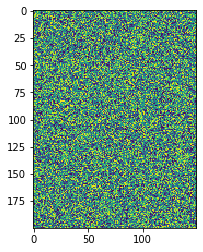

In [7]:
# showing image of the generated pixels

plt.imshow(image)

In [10]:
#bluring the generated image with the gaussianBlur function
blurred_image = gaussian_blur(image, 3, 1)

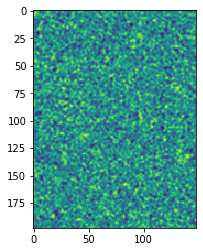

In [12]:
#displaying the blurred image
plt.imshow(blurred_image)

In [3]:
# Generating the gaussian mask OR filter 

import numpy as np #importing numpy to deal with complex computations

def gaussianMask(shape=(3,3),sigma=0.5): #function to create deafault 3X3 gaussian mask and sigma = 0.5
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [5]:
gaussianMask((4,4),1) #calling function on 4x4 shape with sigma = 1

array([[0.01808237, 0.04915298, 0.04915298, 0.01808237],
       [0.04915298, 0.13361166, 0.13361166, 0.04915298],
       [0.04915298, 0.13361166, 0.13361166, 0.04915298],
       [0.01808237, 0.04915298, 0.04915298, 0.01808237]])